<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques that are used to avoid overfitting (but haven't practiced them yet). In this project, we'll practice a fundamental method for avoiding overfitting that is commonly referred to as: _train/test split validation_. 

This is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we will be splitting the data into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California, 20 percent data from elsewhere, and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case, we've still overfit on our data set because we did not sufficiently randomize the data.

Note: In a situation like this, you could use a technique called _k-fold cross-validation_, which is cross-validation applied to more than two subsets. In particular, in k-fold cross-validation, you'd partition your data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. You would do this for each of the possible $k-1$ subsets.

# Project Requirements

The goal of this project will be to create a test-training split to compare multiple models on the same Boston housing data set. For example, you might choose to compare different linear models on the same data.

In this project, you'll fit two to three different models on the Boston housing data. For example, you could pick two different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Work with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train your model on the training data.
* Evaluate your model on the test data.
* Repeat with other variables.
* Rank the models by how well they score on the testing data set. 
* Don't forget to interpret your findings! 



A k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression

As a real estate developer, you are being asked to model the median home price of various houses in the city of Boston using data from the US census. Your goal is to predict a continuous, numeric output (price) based on a combination of discrete features that you choose.

In [4]:
import matplotlib.pyplot as plt

% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### REQUIRED: Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it _ought_ to be pretty clean, but you should always perform exploratory data analysis.

In [56]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column
   
print('-----------------')
print('count nulls in each column')
print(X.isnull().sum())
print('-----------------')


print('-----------------')
print('Index')
print(X.index)
print('-----------------')

print('-----------------')
print('Data types of each column')
print(X.dtypes)
print('-----------------')

print('-----------------')
print('number of rows and columns')
print(X.shape)
print('-----------------')

print('-----------------')
print('Description of each column')
print(X.describe(include='all'))
print('-----------------')

print('-----------------')
print('Unique values for each column')

for column in X.columns:
    print('for '+ column + ' ' + str(len(X.groupby(column))) + ' unique values')

-----------------
count nulls in each column
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64
-----------------
-----------------
Index
RangeIndex(start=0, stop=506, step=1)
-----------------
-----------------
Data types of each column
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object
-----------------
-----------------
number of rows and columns
(506, 13)
-----------------
-----------------
Description of each column
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.2

## Using `scikit-learn` Linear Regression

### REQUIRED: Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict your target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [57]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
lr = LinearRegression()

In [58]:
X_train = X[['RM', 'AGE', 'TAX']] 

### REQUIRED: Try 70/30 and 90/10 train/test splits: 70% of the data for training - 30% for testing, then 90% for training - 10% for testing.
Score and plot both of these approaches. How do your metrics change? What does this tell us about the size of training/testing splits? Include a written response.

In [144]:
from sklearn.model_selection import train_test_split

data = X[['RM', 'AGE', 'TAX']]

# Split data to 70% of training data and 30% of test data
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=0)

In [145]:
lr_70_30 = LinearRegression()
lr_70_30.fit(X_train, y_train) #training

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [146]:
lr_70_30.intercept_

array([-19.67735368])

In [147]:
lr_70_30.score(X_train, y_train)

0.6018278136295503

In [148]:
lr_70_30.coef_

array([[ 8.02607924, -0.03936742, -0.01367152]])

In [149]:
y_pred = lr_70_30.predict(X_test)

In [97]:
df_pred = pd.DataFrame(y_pred)
df = pd.concat([y_test.reset_index(), df_pred], axis=1)
df = df.drop(columns=['index'])
df = df.rename(columns = {'MEDV': 'Actual', 0: 'Predicted_70/30'})

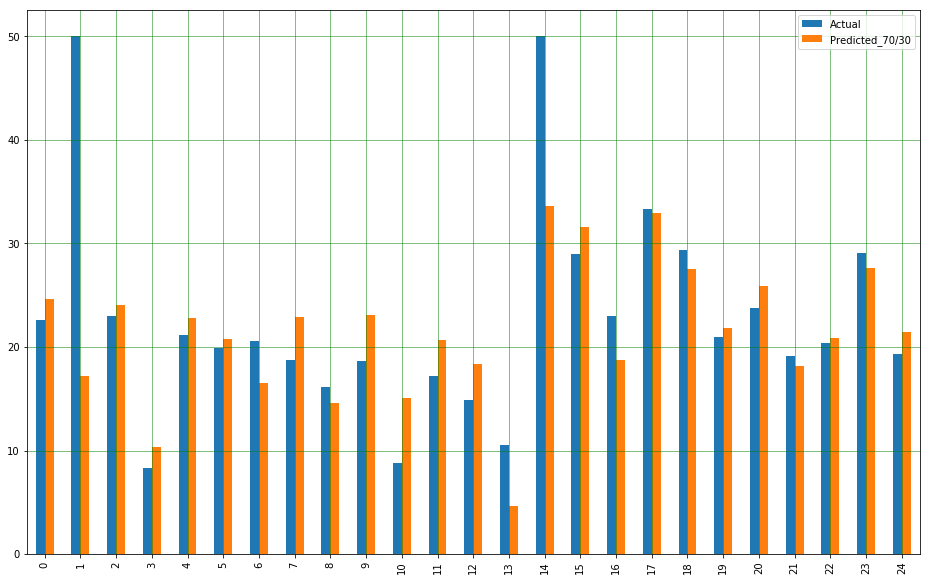

In [98]:
#Create hist from first 25 results
df = df.head(25)
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [99]:
# Split data to 90% of training data and 10% of test data
X2_train, X2_test, y2_train, y2_test = train_test_split(data, y, test_size=0.1, random_state=0)

In [100]:
lr_90_10 = LinearRegression()
lr_90_10.fit(X2_train, y2_train) #training

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
y_pred2 = lr_90_10.predict(X2_test)

In [102]:
df2_pred = pd.DataFrame(y_pred2)
df2 = pd.concat([y_test.reset_index(), df2_pred], axis=1)
df2 = df2.drop(columns=['index'])
df2 = df2.rename(columns = {'MEDV': 'Actual2', 0: 'Predicted_90/10'})

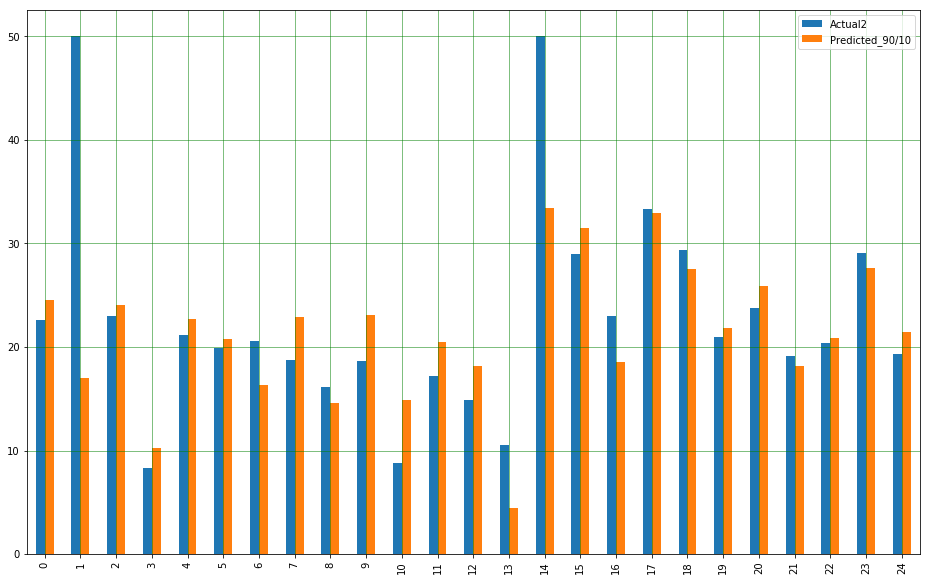

In [103]:
#Create hist from first 25 results
df2 = df2.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [104]:
# combo_df contains all apredicted values in 2 cases (70/30 and 90/10)

In [105]:
combo_df = pd.concat([df, df2], axis = 1)
combo_df = combo_df.drop(columns=['Actual2'])

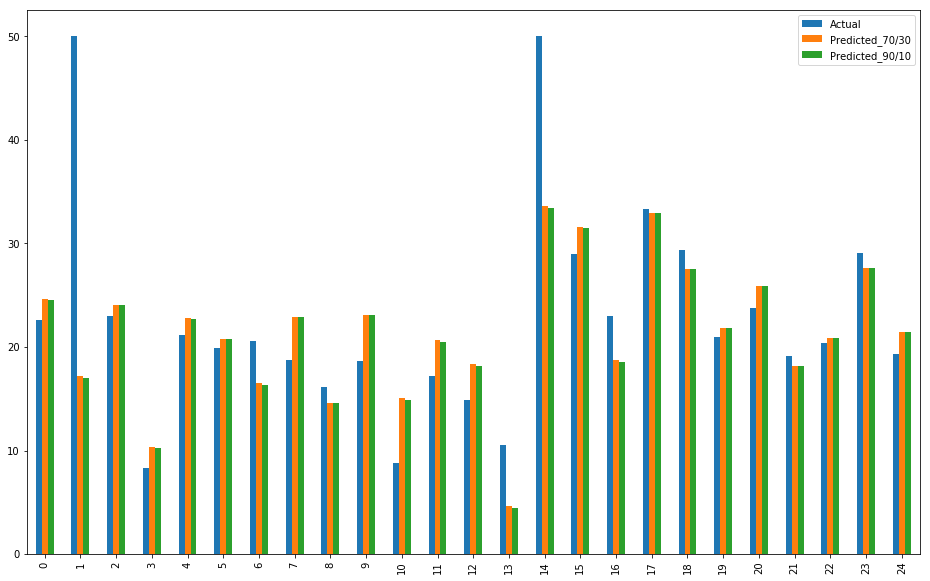

In [106]:
combo_df = combo_df.head(25)
combo_df.plot(kind='bar',figsize=(16,10))
plt.show()

In [48]:
# From this hist, I can say that difference in amount of training data is not very big
# Most of the predicted values the same of a little smaller.
# Also, I see that more predicted values from 90/10 a little closer 
# to original result.
# I think the difference between these 2 tests is  insignificant, because data set is not big.
# we have just 506 rows

## BONUS: Try the k-fold cross-validation technique described above, varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds? Include a written response.

In [107]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr_70_30, X_train, y_train, cv = 5)

In [108]:
score_5_avg = cross_val_score(lr_70_30, X_train, y_train, cv = 5)
score_5_avg = sum(score_5_avg)/len(score_5_avg)
score_5_avg

0.582804940078328

In [109]:
score_7_avg = cross_val_score(lr_70_30, X_train, y_train, cv = 7)
score_7_avg = sum(score_7_avg)/len(score_7_avg)
score_7_avg

0.5782644142310244

In [110]:
score_10_avg = cross_val_score(lr_70_30, X_train, y_train, cv = 10)
score_10_avg = sum(score_10_avg)/len(score_10_avg)
score_10_avg

0.5757505141553764

In [111]:
# this what I found on stack over flow
# Larger K means less bias towards overestimating the true expected error 
# (as training folds will be closer to the total dataset) but higher variance and higher running time 

#from my results I see that, bigger number of folds leads
# to smaller score

## BONUS
Practice the same workflow you just worked through above, but this time use Statsmodels instead of Sklearn for linear regression. See example formulas below.

### Example: Statsmodels Formulas

Adjust the formula using your chosen metrics from the housing data. Remember, your workflow here is the same, but the syntax is a little different. Describe your results. Are they comparable to scikit-learn's regression models?

In [122]:
# First, format your data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [124]:
# Set up your new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX",
    "case4": "MEDV ~ RM + AGE + TAX"
}

model = smf.ols(formula=formulas['case4'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     221.8
Date:                Wed, 28 Aug 2019   Prob (F-statistic):           1.35e-91
Time:                        16:40:41   Log-Likelihood:                -1626.7
No. Observations:                 506   AIC:                             3261.
Df Residuals:                     502   BIC:                             3278.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.9550      2.889     -6.561      0.000     -24.631     -13.279
RM             7.8428      0.403     19.456      0.000       7.051       8.635
AGE           -0.0371      0.011     -3.321      0.001      -0.059      -0.015
TAX           -0.0129      0.002     -6.811      0.000      -0.017      -0.009
==============================================================================
Omnibus:                      282.927   Durbin-Watson:                   0.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2908.375
Skew:                           2.242   Prob(JB):                         0.00
Kurtosis:                      13.855   Cond. No.                     4.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [150]:
# lr_70_30.intercept_
# lr_70_30.score(X_train, y_train)
# lr_70_30.coef_

# I checked some of the values from scikit-learn's regression models from test 70/30
# All values for intersept, score and coef are a little different compare to statsmodel
# (I created new formula, so in both cases features are the same)

0.6018278136295503

### BONUS:

Can you optimize your R2, selecting the best features? Provide your code and explain your process in a brief written response.

### BONUS:

Given a combination of predictors, can you identify another response variable that could be accurately predicted through the exploration of different predictors in this data set?

_Tip: Consider pairplots, coefficients, or Pearson scores._

In [10]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


## BONUS/DEMO: Up for an additional challenge? Try again, this time using the `patsy` library.

In [133]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [136]:
from sklearn.model_selection import train_test_split  #Note: if you didn't import this earlier, you'll need to do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM + TAX", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [141]:
from sklearn import metrics
# from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.6804263744750343


In [151]:
lr_70_30.score(X_train, y_train)

0.6018278136295503